Smith ita - eng DEBUG

In [26]:
import os
import csv
import matplotlib.pyplot as plt
import pickle
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from gensim.models import KeyedVectors
import copy
import numpy as np

Display loss

In [27]:
def plot_progress(output_folder):
    # Plot learning curve
    loss_fn = os.path.join(output_folder, 'train_mod', 'loss_output.csv')
    data_x = []
    data_y = []

    with open(loss_fn) as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',')
        for row in spamreader:
            data_x.append(int(row[0]))
            data_y.append(float(row[1]))


    plt.plot(data_x, data_y, c='r')
    plt.title('Learning curve')
    plt.xlabel('Epochs')
    plt.ylabel('Avg sims')
    plt.grid()
    plt.show()

    # Plot precision curves
    def append_precs(var, data):
        var[0].append(data[1][0])
        var[1].append(data[1][1])
        var[2].append(data[1][2])

    colors = ['b', 'g', 'y']
    prec_nbs = [1, 5, 10]
    prec_en_it = [[], [], []]
    prec_it_en = [[], [], []]
    prec_fn = os.path.join(output_folder, 'train_mod', 'precision_output')
    with open(prec_fn, 'rb') as picklefile:
        precs = pickle.load(picklefile)
    for i, ls in enumerate(precs):
        en_it = ls[0]
        it_en = ls[1]
        append_precs(prec_en_it, en_it)
        append_precs(prec_it_en, it_en)

    nb = len(prec_en_it)
    plt.title('Precision en-it')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.grid()
    for i in range(nb):
        plt.plot(data_x, prec_en_it[i], c=colors[i], label='n={}'.format(prec_nbs[i]))
    plt.legend()
    plt.show()
    plt.title('Precision it-en')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.grid()
    for i in range(nb):
        plt.plot(data_x, prec_it_en[i], c=colors[i], label='n={}'.format(prec_nbs[i]))
    plt.legend()
    plt.show()

100 epochs, without SVD  
precs: on training words, on filtered embeddings - strat 0

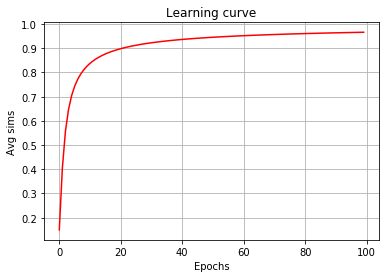

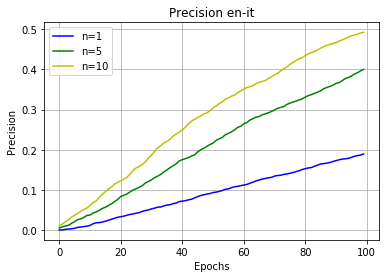

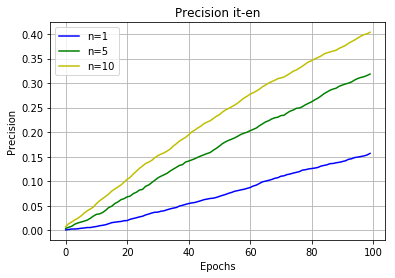

In [28]:
output_folder = '/home/eszti/projects/dipterv/panlex/output_permanent/20180116_1449_58'
plot_progress(output_folder=output_folder)

100 epochs, with SVD on every 10th epoch  
precs: on training words, on filtered embeddings - strat 0

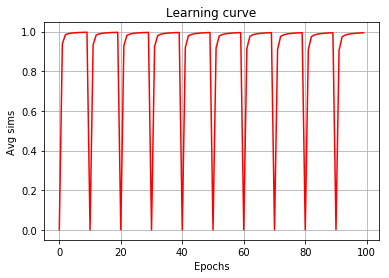

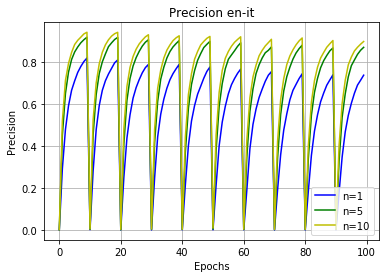

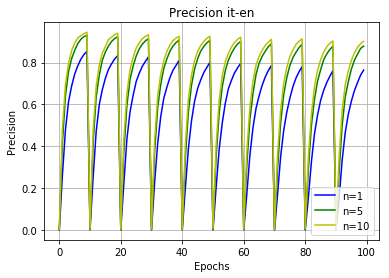

In [29]:
output_folder = '/home/eszti/projects/dipterv/panlex/output_permanent/20180116_1545_35'
plot_progress(output_folder=output_folder)

Check precision

In [30]:
emb_fn = '/mnt/permanent/Language/Multi/FB/wiki.en/wiki.en.vec'
limit = 10000
model = KeyedVectors.load_word2vec_format(emb_fn, binary=False, limit=limit)

In [32]:
nbs = [1, 50, 99]
T_fn = os.path.join(output_folder, 'train_mod', 'T_{}.pickle'.format(nbs[0]))
with open(T_fn, 'rb') as f:
    T = pickle.load(f)

model.most_similar('dog')
model['dog'].shape
model['dog'][0]

model_T = copy.deepcopy(model)
W = copy.deepcopy(model_T.syn0)
model_T.syn0 = np.dot(W, T[0])
model_T.most_similar('dog')
model_T['dog'].shape
model_T['dog'][0]

[('dogs', 0.8104336857795715),
 ('rabbit', 0.649113118648529),
 ('cat', 0.6380517482757568),
 ('pig', 0.6210767030715942),
 ('cow', 0.5820291042327881),
 ('pet', 0.5802521705627441),
 ('breed', 0.571986198425293),
 ('animal', 0.5635776519775391),
 ('shepherd', 0.5540464520454407),
 ('sheep', 0.5497960448265076)]

(300,)

0.19083001

[('dogs', 0.8104336857795715),
 ('rabbit', 0.649113118648529),
 ('cat', 0.6380517482757568),
 ('pig', 0.6210767030715942),
 ('cow', 0.5820291042327881),
 ('pet', 0.5802521705627441),
 ('breed', 0.571986198425293),
 ('animal', 0.5635776519775391),
 ('shepherd', 0.5540464520454407),
 ('sheep', 0.5497960448265076)]

(300,)

1.416971